In [7]:
variables_explicativas_2000<-read.csv("datos_31_mayo_2016.csv",
        header=TRUE, sep="," , dec=".",stringsAsFactors=FALSE)

precios_1995<-read.csv("Precios_1995.csv", 
        header = TRUE, sep = ",",dec=".",stringsAsFactors=FALSE)

In [8]:
#datos1<-read.delim(file.choose(),sep=",")
library(Cairo)

In [9]:
pa<-precios_1995$X..KWh_Const_Dic_2008

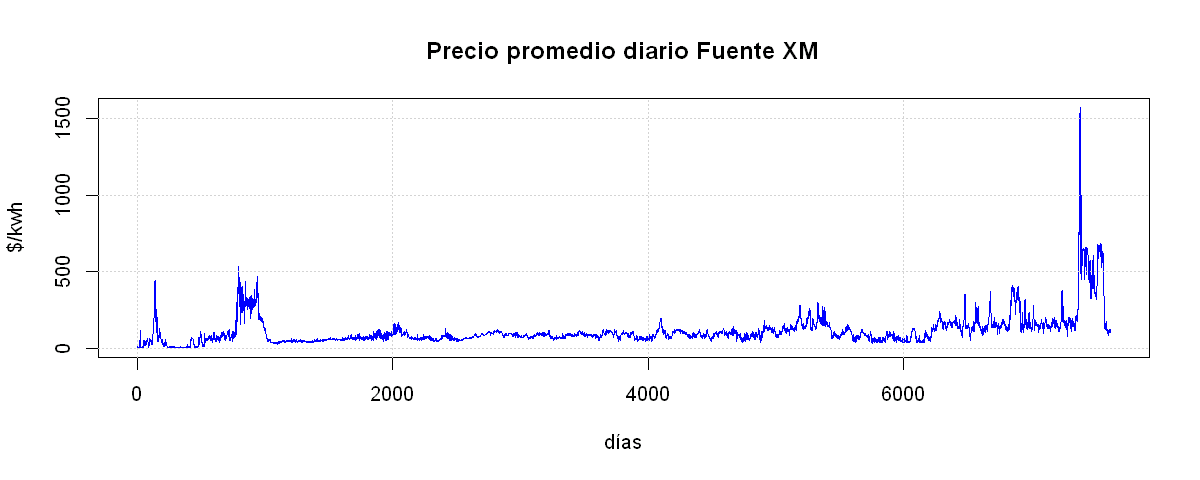

In [16]:
#Grafica de precios diarios promedio. tomado de XM


plot(pa, type = "l",xlab = "días",ylab = "$/kwh", main = "Precio promedio diario Fuente XM",col  = "Blue")
grid()


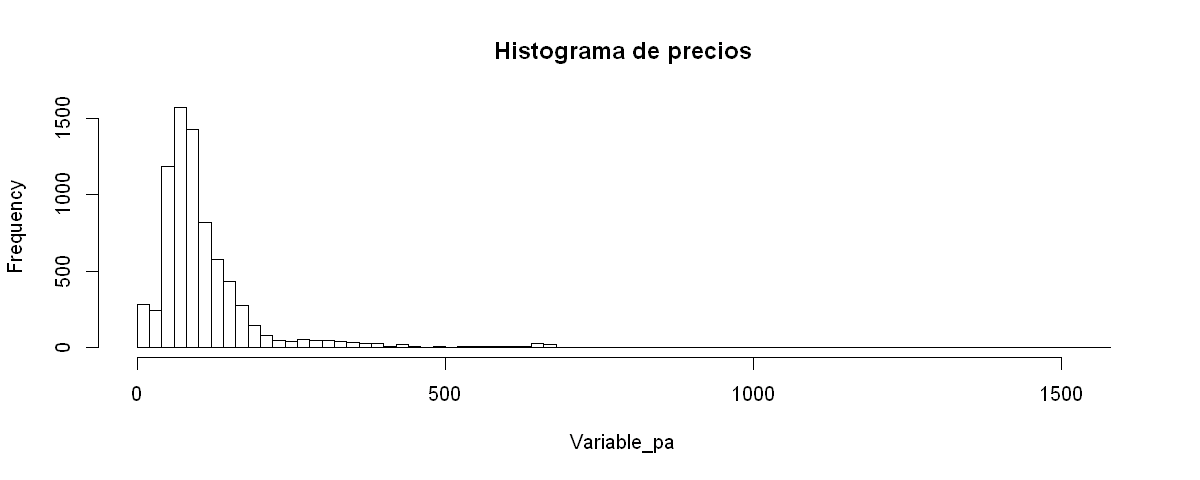

In [17]:
hist(pa,100, main = "Histograma de precios", xlab = "Variable_pa")

In [18]:
library(moments)
media<-round(mean(pa),2)
var<-round(var(pa),2)
asimet<-round(skewness(pa),2)
curt<-round(kurtosis(pa),2)
total_datos<-length(pa)
max<-round(max(pa),2)
min<-round(min(pa),2)

estadisticos<-c(media=media,varianza=var,asimetria=asimet,curtosis=curt,minimo=min,maximo=max,total_datos=total_datos)
estadisticos


media    varianza   asimetria    curtosis      minimo      maximo 
     113.56    11675.02        4.69       39.13        1.67     1567.68 
total_datos 
    7622.00

In [19]:
jarque.test(pa)


	Jarque-Bera Normality Test

data:  pa
JB = 442540, p-value < 2.2e-16
alternative hypothesis: greater


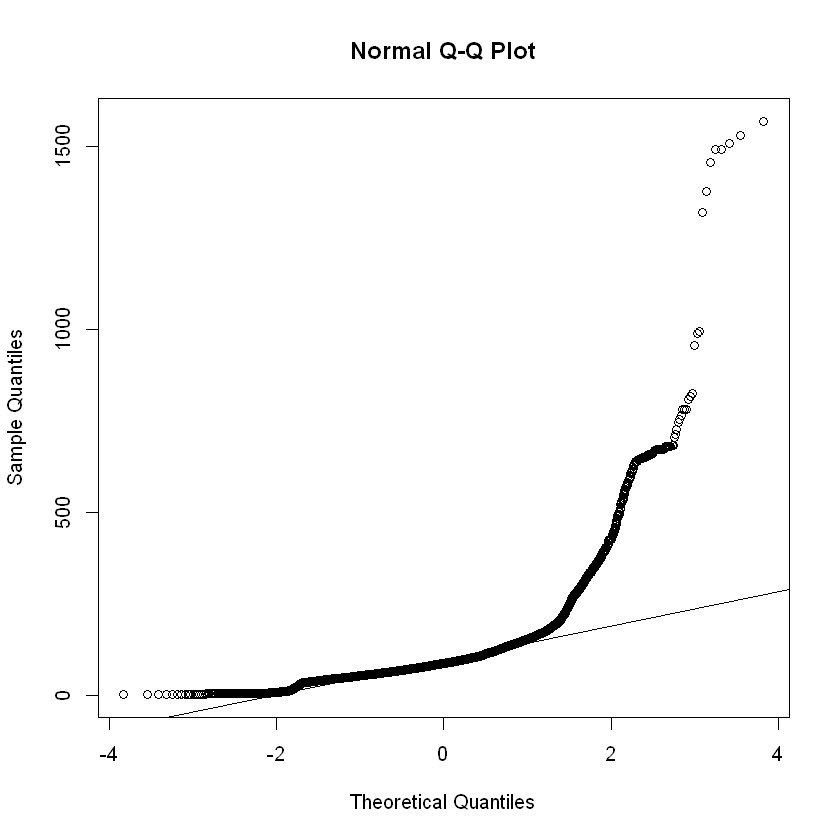

In [12]:
qqnorm(pa)
qqline(pa)

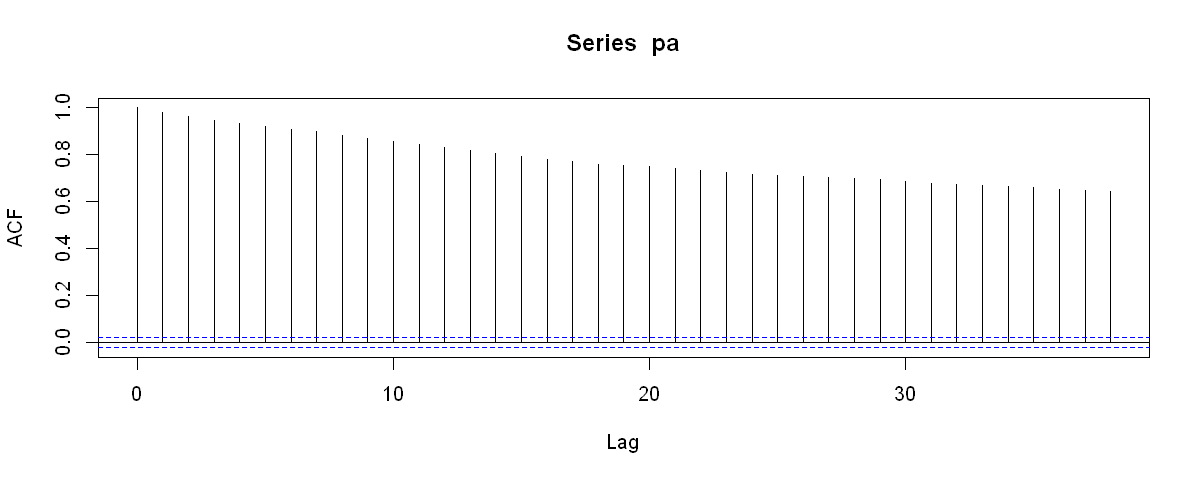

In [21]:
acf(pa)

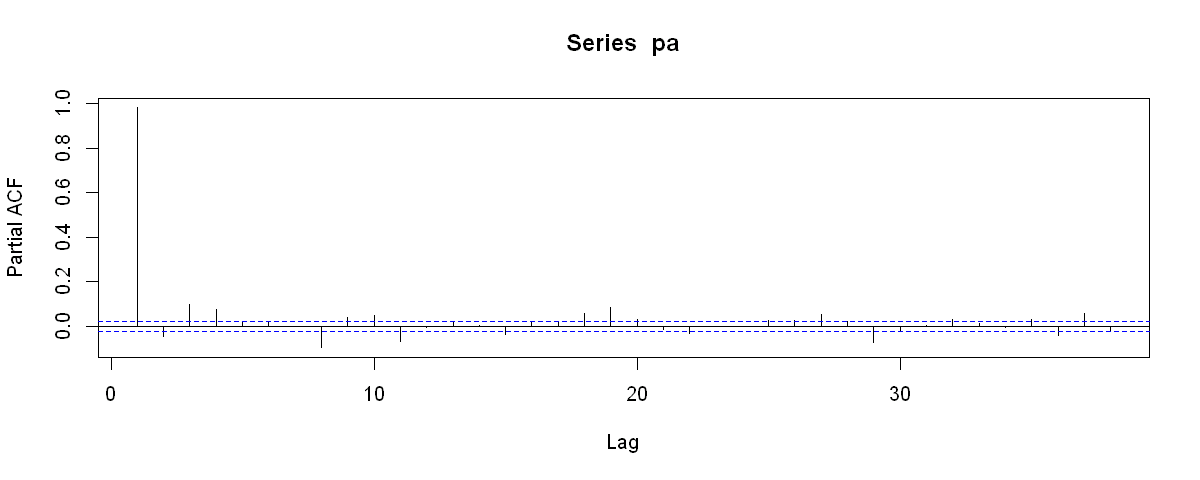

In [22]:
pacf(x = pa)

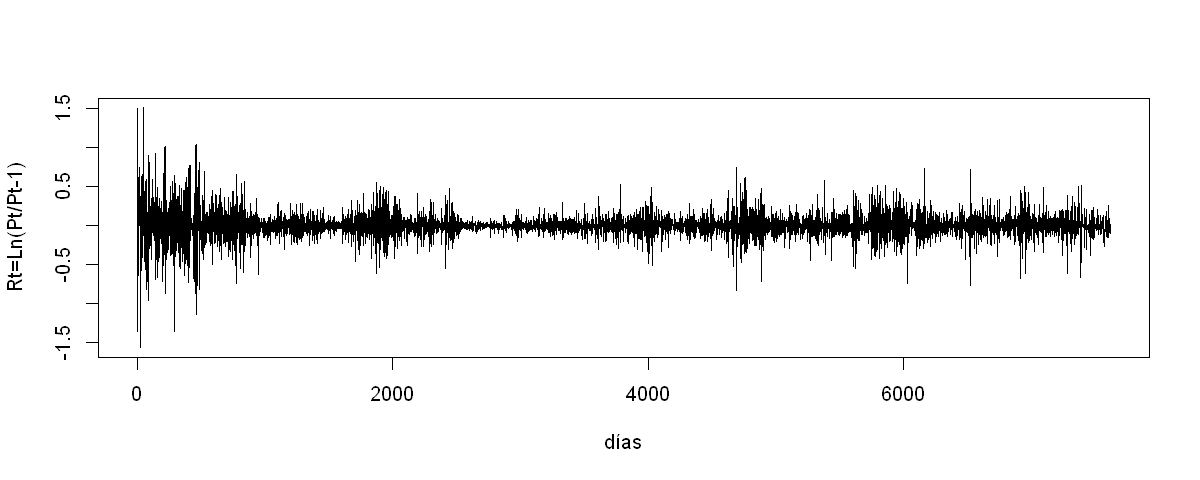

In [23]:
##################################TRABAJAR CON LOS RENDIMIENTOS PARA NORMALIZAR LA SERIE########################################

#transformacion de los datos en rendimientos logaritmicos Rt=(Pt/Pt-1)
 transformada_prec<-c()
for (i in seq(length(pa)-1)) {
    transformada_prec<-c(transformada_prec,log(pa[i+1]/pa[i]))  
}


plot(x=transformada_prec,type = "l",xlab = "días",ylab = "Rt=Ln(Pt/Pt-1)")

In [24]:
library(moments)
media_rend<-round(mean(transformada_prec,6))
var_rend<-round(var(transformada_prec),6)
asimet_rend<-round(skewness(transformada_prec),2)
curt_rend<-round(kurtosis(transformada_prec),6)
total_datos_rend<-length(transformada_prec)
max_rend<-round(max(transformada_prec),6)
min_rend<-round(min(transformada_prec),6)

estadisticos_rend<-c(media=media_rend,varianza=var_rend,asimetria=asimet_rend,curtosis=curt_rend,minimo=min_rend,maximo=max_rend,total_datos=total_datos_rend)
estadisticos_rend


media    varianza   asimetria    curtosis      minimo      maximo 
   0.000000    0.022212    0.090000   16.918028   -1.564245    1.509980 
total_datos 
7621.000000

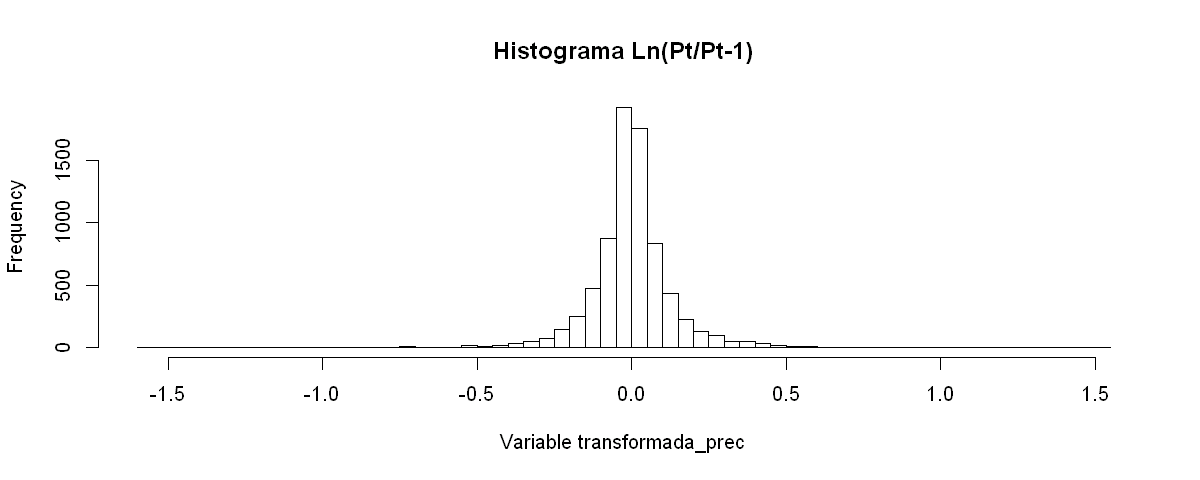

In [26]:
hist(transformada_prec,breaks = 100,main = "Histograma Ln(Pt/Pt-1)",xlab = "Variable transformada_prec")

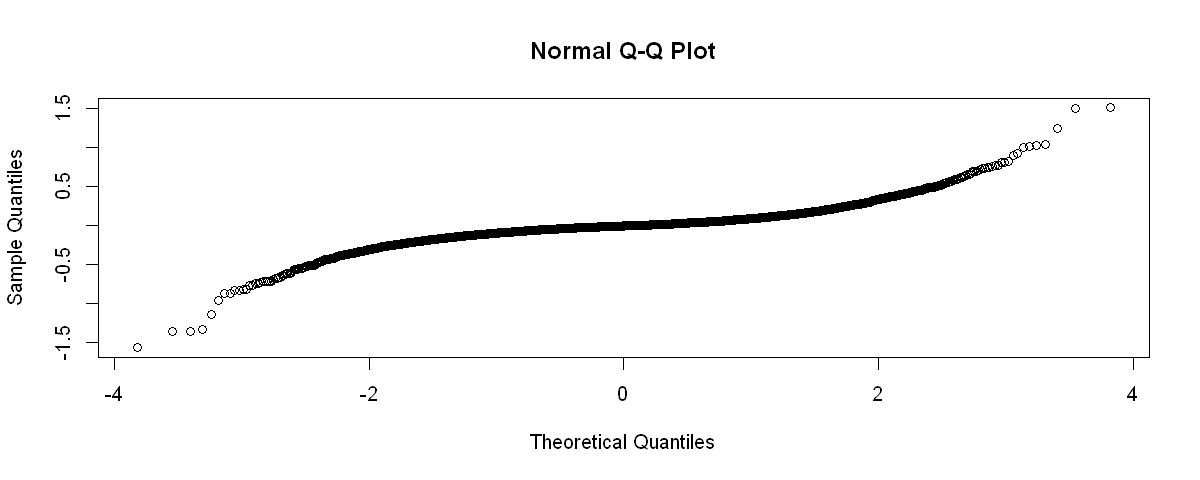

In [27]:
qqnorm(transformada_prec)

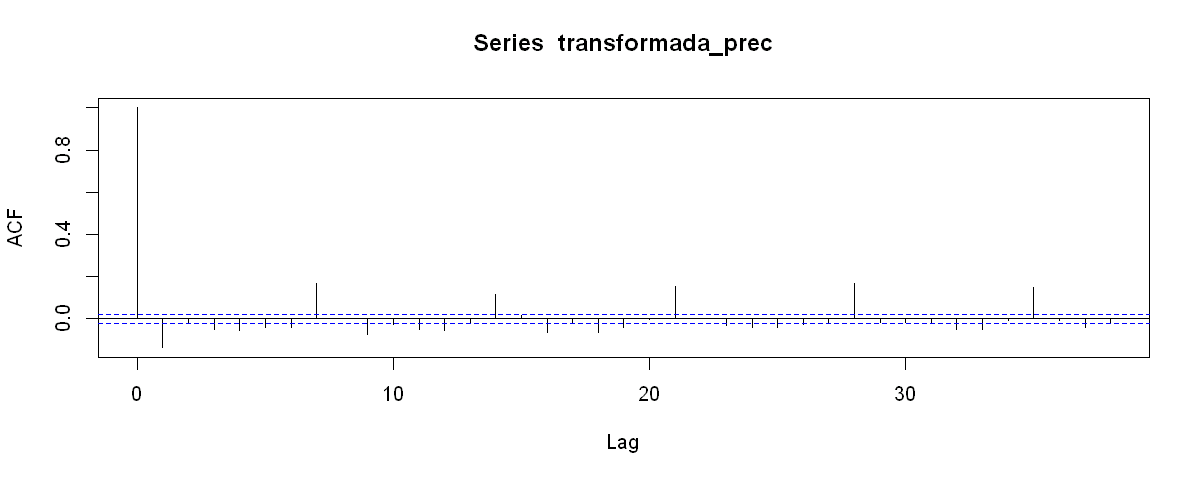

In [28]:
acf(transformada_prec)

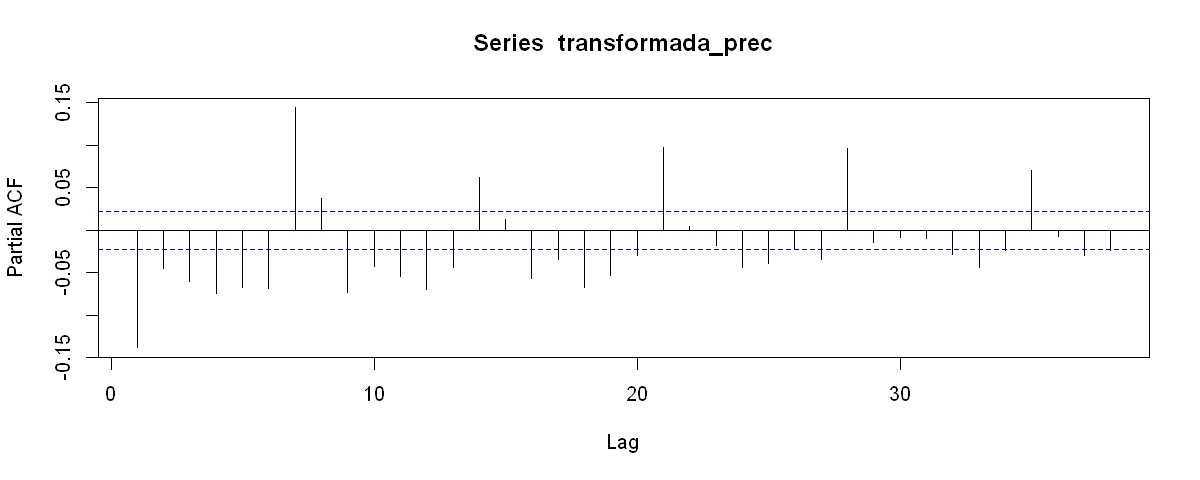

In [29]:
pacf(transformada_prec)

In [30]:
jarque.test(transformada_prec)


	Jarque-Bera Normality Test

data:  transformada_prec
JB = 61521, p-value < 2.2e-16
alternative hypothesis: greater



	Jarque-Bera Normality Test

data:  ln_pa
JB = 7684.9, p-value < 2.2e-16
alternative hypothesis: greater


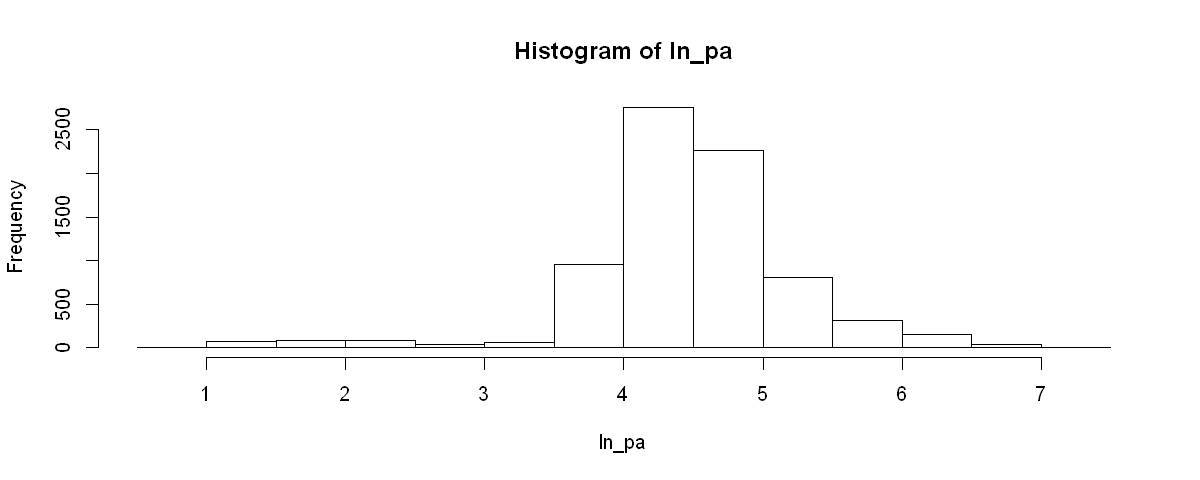

In [31]:
ln_pa<-log(pa)
hist(ln_pa)
jarque.test(ln_pa)

In [34]:
diff.1<-diff(pa)


In [37]:
######            La serie de tiempo del precio de la electricidad Pt ################
diff.1.ts<-ts(diff.1,start = c(1995,202),frequency = 365)
print(diff.1.ts)

Time Series:
Start = c(1995, 202) 
End = c(2016, 157) 
Frequency = 365 
   [1]   11.773  -12.244   -1.060   11.222  -10.567   -0.137   -1.749   -0.289
   [9]    1.430   -0.864    0.033    1.428   -0.099    1.470    0.894    1.994
  [17]    0.011    4.401    9.814   24.483   20.163    3.820   31.715   12.033
  [25]   -3.813  -62.238  -19.490  -22.818    0.426   -2.797    3.215   -2.168
  [33]   -1.722    1.119    0.560    0.468   -1.370   -0.198    1.294    1.127
  [41]    0.014   -0.299    0.132    5.389   -3.777   26.277    6.409   10.418
  [49]   -0.153    0.594   -1.408   -0.138    0.377  -11.017    4.163   -4.262
  [57]   -0.760   -9.794  -10.241   10.019    8.706   10.414   -9.029    1.364
  [65]   -4.028  -15.053   15.622    3.195   -0.493   -0.902    0.067   11.047
  [73]  -27.237   17.494    1.726    3.775    5.448    0.561    3.888   -1.042
  [81]   10.044   -7.002    3.532  -30.608  -13.510   -9.788   -2.605    0.379
  [89]    5.646    0.333   11.253    9.877   -2.072   -7.39

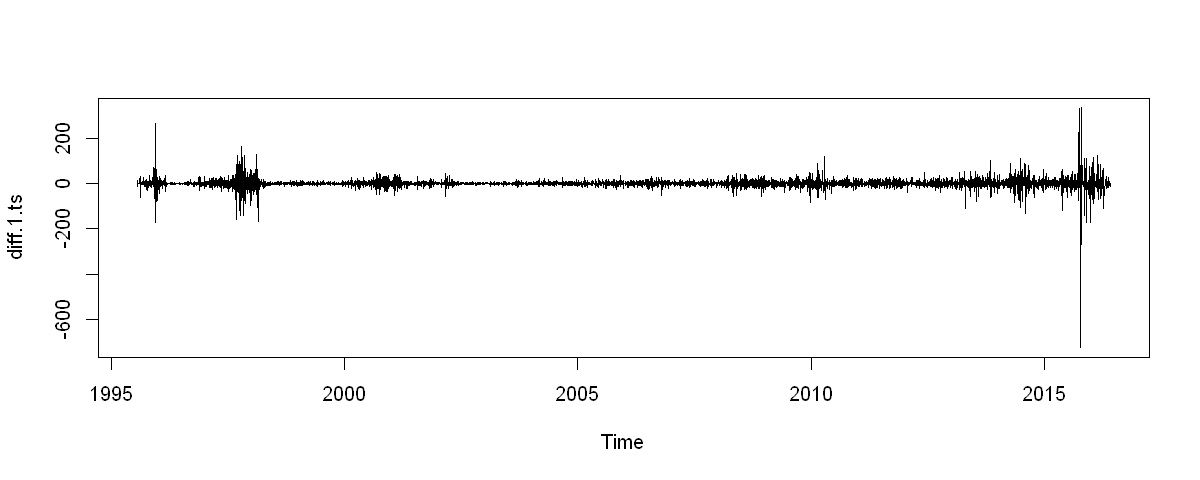

In [38]:
plot(diff.1.ts)

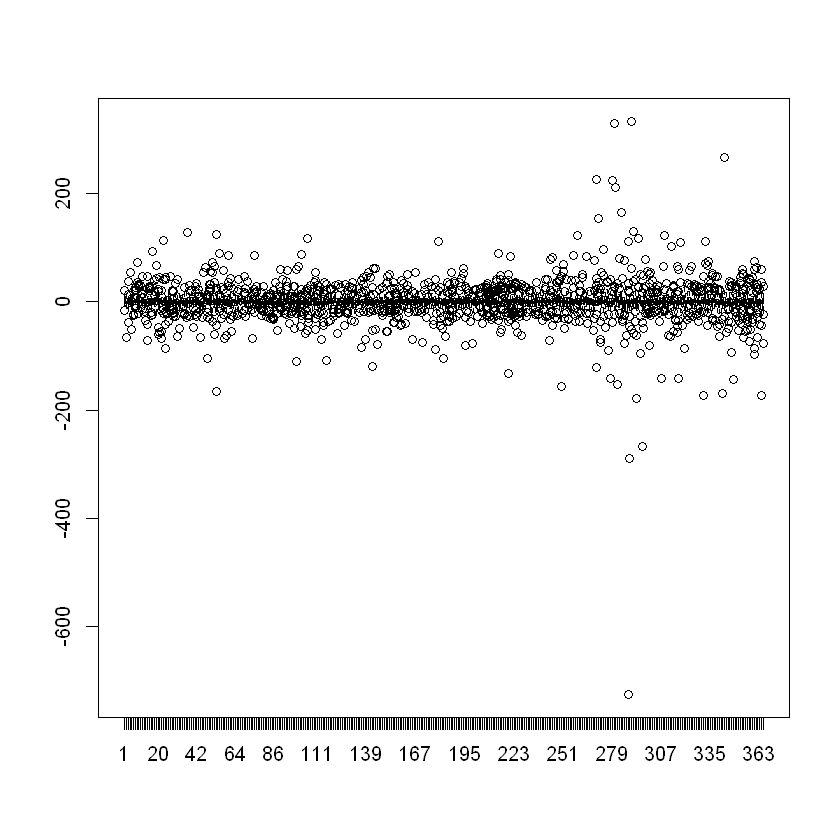

In [42]:
boxplot(diff.1.ts ~ cycle(diff.1.ts))

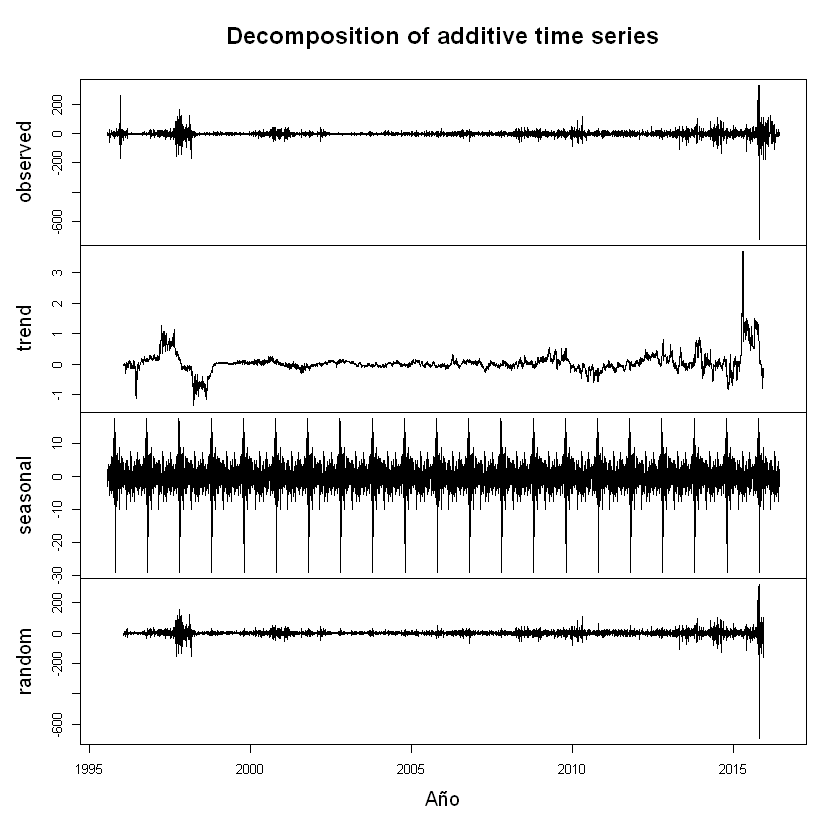

In [45]:
diff.ts.desc<-decompose(diff.1.ts)
plot(diff.ts.desc, xlab="Año")

In [46]:
pt1<-c(0,head(pa,length(pa)-1))
datos5<-data.frame(Y=pa,X1=pt1)
mod1=lm(Y~X1,data=datos5)
mod1


Call:
lm(formula = Y ~ X1, data = datos5)

Coefficients:
(Intercept)           X1  
     2.0926       0.9817  
